In [ ]:
# Plan (using Trello, so we can also see where you are)
# ● Formulate question 
# ● Find data 
# ● Clean data using Python 
# ● Store clean data in both a .csv file and a MySQL Database 
# ● Exploratory Analysis, reading data from MySQL
# ● Visualize data using Tableau
# ● Create and test (at least one) hypothesis
# ● (optional: build a Machine Learning model
# ○ But only if it helps answer your research question)
# ● Formulate conclusions / answers

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Column Descriptions:
# age - age
# bp - blood pressure
# sg - specific gravity
# al - albumin
# su - sugar
# rbc - red blood cells
# pc - pus cell
# pcc - pus cell clumps
# ba - bacteria
# bgr - blood glucose random
# bu - blood urea
# sc - serum creatinine
# sod - sodium
# pot - potassium
# hemo - hemoglobin
# pcv - packed cell volume
# wc - white blood cell count
# rc - red blood cell count
# htn - hypertension
# dm - diabetes mellitus
# cad - coronary artery disease
# appet - appetite
# pe - pedal edema
# ane - anemia
# class - class

In [3]:
# importing the depedencies
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [4]:
# Data Collection and Processing 
# data collection contains 920 rows 

In [5]:
df = pd.read_csv("kidney_disease_india.csv")

In [8]:
# print first rows 
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [10]:
df.tail()


,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47.0,6700.0,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54.0,7800.0,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49.0,6600.0,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51.0,7200.0,5.9,no,no,no,good,no,no,notckd
399,399,58.0,80.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,53.0,6800.0,6.1,no,no,no,good,no,no,notckd


In [12]:
df.shape

(400, 26)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    object 
 1   age             376 non-null    float64
 2   bp              376 non-null    float64
 3   sg              341 non-null    float64
 4   al              342 non-null    float64
 5   su              340 non-null    float64
 6   rbc             243 non-null    object 
 7   pc              324 non-null    object 
 8   pcc             381 non-null    object 
 9   ba              381 non-null    object 
 10  bgr             343 non-null    float64
 11  bu              367 non-null    float64
 12  sc              369 non-null    float64
 13  sod             304 non-null    float64
 14  pot             303 non-null    float64
 15  hemo            338 non-null    float64
 16  pcv             320 non-null    float64
 17  wc              286 non-null    flo

In [16]:
df.isnull().sum()

id                  0
age                24
bp                 24
sg                 59
al                 58
su                 60
rbc               157
pc                 76
pcc                19
ba                 19
bgr                57
bu                 33
sc                 31
sod                96
pot                97
hemo               62
pcv                80
wc                114
rc                137
htn                17
dm                 17
cad                17
appet              16
pe                 16
ane                16
classification     15
dtype: int64

In [17]:
## 3 Which columns are numerical?
# displaying only columns with numerical values
display(df.select_dtypes(np.number).columns)
print("Total column(s) with numerical values:",len(df.select_dtypes(np.number).columns))

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo',
       'pcv', 'wc', 'rc'],
      dtype='object')

Total column(s) with numerical values: 14


In [18]:
## 4 Which columns are categorical?
display(df.select_dtypes(object).columns)
print("Total column(s) with categorical values:",len(df.select_dtypes(object).columns))

Index(['id', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe',
       'ane', 'classification'],
      dtype='object')

Total column(s) with categorical values: 12


In [19]:
nulls = pd.DataFrame(round(df.isna().sum()/len(df),4)*100)
nulls = nulls.reset_index()
nulls.columns = ['header_name', 'nulls_in_%']
display(nulls)

,header_name,nulls_in_%
0,id,0.00
1,age,6.00
2,bp,6.00
3,sg,14.75
4,al,14.50
5,su,15.00
6,rbc,39.25
7,pc,19.00
8,pcc,4.75
9,ba,4.75


In [20]:
# looking for duplicates
duplicate = df[df.duplicated()]
print(len(duplicate))

0


In [21]:
df.nunique()

id                400
age                75
bp                 10
sg                  5
al                  6
su                  6
rbc                 2
pc                  2
pcc                 2
ba                  2
bgr               144
bu                116
sc                 83
sod                34
pot                40
hemo              115
pcv                42
wc                 88
rc                 44
htn                 2
dm                  3
cad                 2
appet               2
pe                  2
ane                 2
classification      2
dtype: int64

In [22]:
df.to_excel("kidney_disease_india.xlsx")

In [23]:
print(df['rbc'].unique())

[nan 'normal' 'abnormal']


In [24]:
df.loc[df['rbc'] == "normal", 'rbc'] = 1
df.loc[df['rbc'] == "abnormal", 'rbc'] = 0

In [25]:
print(df['pc'].unique())

['normal' 'abnormal' nan]


In [26]:
df.loc[df['pc'] == "normal", 'pc'] = 1
df.loc[df['pc'] == "abnormal", 'pc'] = 0

In [27]:
print(df['pcc'].unique())

['notpresent' 'present' nan]


In [28]:
df.loc[df['pcc'] == "notpresent", 'pcc'] = 0
df.loc[df['pcc'] == "present", 'pcc'] = 1

In [29]:
print(df['ba'].unique())

['notpresent' 'present' nan]


In [30]:
df.loc[df['ba'] == "notpresent", 'ba'] = 0
df.loc[df['ba'] == "present", 'ba'] = 1

In [31]:
print(df['htn'].unique())

['yes' 'no' nan]


In [32]:
df.loc[df['htn'] == "no", 'htn'] = 0
df.loc[df['htn'] == "yes", 'htn'] = 1

In [33]:
print(df['dm'].unique())

['yes' 'no' ' yes' nan]


In [34]:
df.loc[df['dm'] == "no", 'dm'] = 0
df.loc[df['dm'] == "yes", 'dm'] = 1
df.loc[df['dm'] == " yes", 'dm'] = 1

In [35]:
print(df['cad'].unique())

['no' 'yes' nan]


In [36]:
df.loc[df['cad'] == "no", 'cad'] = 0
df.loc[df['cad'] == "yes", 'cad'] = 1

In [37]:
print(df['appet'].unique())

['good' 'poor' nan]


In [38]:
df.loc[df['appet'] == "poor", 'cad'] = 0
df.loc[df['appet'] == "good", 'cad'] = 1

In [39]:
print(df['pe'].unique())

['no' 'yes' nan]


In [40]:
df.loc[df['pe'] == "no", 'pe'] = 0
df.loc[df['pe'] == "yes", 'pe'] = 1

In [41]:
df.loc[df['ane'] == "no", 'ane'] = 0
df.loc[df['ane'] == "yes", 'ane'] = 1

In [42]:
print(df['classification'].unique())

['ckd' nan 'notckd']


In [43]:
df.loc[df['classification'] == "notckd", 'classification'] = 0
df.loc[df['classification'] == "ckd", 'classification'] = 1
df.loc[df['classification'] == "nan", 'classification'] = 0

In [44]:
print(df['classification'].unique())

[1 nan 0]


In [45]:
print(df['appet'].unique())

['good' 'poor' nan]


In [46]:
nan_counts = df.isnull().sum()
print(nan_counts)


id                  0
age                24
bp                 24
sg                 59
al                 58
su                 60
rbc               157
pc                 76
pcc                19
ba                 19
bgr                57
bu                 33
sc                 31
sod                96
pot                97
hemo               62
pcv                80
wc                114
rc                137
htn                17
dm                 17
cad                15
appet              16
pe                 16
ane                16
classification     15
dtype: int64


In [47]:
df2 = df.dropna(axis=0)
df2['classification'].value_counts()

0    115
1     41
Name: classification, dtype: int64

In [48]:
nan_counts = df.isnull().sum()
print(nan_counts)

id                  0
age                24
bp                 24
sg                 59
al                 58
su                 60
rbc               157
pc                 76
pcc                19
ba                 19
bgr                57
bu                 33
sc                 31
sod                96
pot                97
hemo               62
pcv                80
wc                114
rc                137
htn                17
dm                 17
cad                15
appet              16
pe                 16
ane                16
classification     15
dtype: int64


In [50]:
# statistical measures about the data
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
count,376.000000,376.000000,341.000000,342.000000,340.000000,343.000000,367.000000,369.000000,304.000000,303.000000,338.000000,320.000000,286.000000,263.000000
mean,51.364362,76.303191,1.017595,0.985380,0.464706,148.180758,57.420163,3.096070,137.600329,4.633333,12.555030,38.937500,8416.783217,4.706464
std,16.960745,13.658837,0.005669,1.340686,1.113840,80.234940,50.992355,5.834599,10.504390,3.239284,2.936204,9.063128,2956.040168,1.005555
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000,9.000000,2200.000000,2.100000
25%,41.750000,70.000000,1.015000,0.000000,0.000000,99.500000,27.000000,0.900000,135.000000,3.800000,10.400000,32.000000,6500.000000,3.900000
50%,54.000000,80.000000,1.020000,0.000000,0.000000,121.000000,41.000000,1.200000,138.000000,4.400000,12.750000,40.500000,8000.000000,4.800000
75%,64.000000,80.000000,1.020000,2.000000,0.000000,162.500000,66.000000,2.800000,142.000000,4.900000,15.000000,45.250000,9800.000000,5.400000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000,54.000000,26400.000000,6.500000


In [51]:
df = df.drop(columns=["id"])

In [52]:
df.to_excel("kidney_disease_india_after_cleaning1.xlsx")

In [53]:
# checking the distribution of target variable
df['classification'].value_counts()

1    235
0    150
Name: classification, dtype: int64

In [54]:
df2 = df.dropna(axis=0)
df2['classification'].value_counts()

0    115
1     41
Name: classification, dtype: int64

In [55]:
df = df.dropna()


In [56]:
## 235 classes with chronic kidney disease, 150 with normal kidney disease

In [58]:
# splitting the features and target
# use all the features to analyse the target
# analysing all the columns outside num

# splitting the features and target 

In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

In [60]:
#Transform non-numeric columns into numerical columns
for column in df.columns:
        if df[column].dtype == np.number:
            continue
        df[column] = LabelEncoder().fit_transform(df[column])

C:\Users\it-it\AppData\Local\Temp\ipykernel_25672\2719554504.py:3: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [77]:
df.to_csv("kidney_disease_india1.csv", index=False)

In [78]:
df.to_excel("kidney_disease_india3.xlsx", index=False)

In [79]:
X = df.drop(columns='classification', axis=1)
Y = df['classification'] 

In [80]:
print(X)

      age    bp     sg   al   su  rbc  pc  pcc  ba    bgr  ...  hemo   pcv  \
3    48.0  70.0  1.005  4.0  0.0    1   0    1   0  117.0  ...  11.2  32.0   
9    53.0  90.0  1.020  2.0  0.0    0   0    1   0   70.0  ...   9.5  29.0   
11   63.0  70.0  1.010  3.0  0.0    0   0    1   0  380.0  ...  10.8  32.0   
14   68.0  80.0  1.010  3.0  2.0    1   0    1   1  157.0  ...   5.6  16.0   
20   61.0  80.0  1.015  2.0  0.0    0   0    0   0  173.0  ...   7.7  24.0   
..    ...   ...    ...  ...  ...  ...  ..  ...  ..    ...  ...   ...   ...   
395  55.0  80.0  1.020  0.0  0.0    1   1    0   0  140.0  ...  15.7  47.0   
396  42.0  70.0  1.025  0.0  0.0    1   1    0   0   75.0  ...  16.5  54.0   
397  12.0  80.0  1.020  0.0  0.0    1   1    0   0  100.0  ...  15.8  49.0   
398  17.0  60.0  1.025  0.0  0.0    1   1    0   0  114.0  ...  14.2  51.0   
399  58.0  80.0  1.025  0.0  0.0    1   1    0   0  131.0  ...  15.8  53.0   

          wc   rc  htn  dm  cad  appet  pe  ane  
3     6700.0 

In [81]:
print(Y)

3      1
9      1
11     1
14     1
20     1
      ..
395    0
396    0
397    0
398    0
399    0
Name: classification, Length: 156, dtype: int32


In [82]:
# split the data into training data and test data

In [83]:
# creating 4 variables
# X_train- containes the feautures of all training data , 
#X_test - ontaines the feautures of all test data, 
#Y_train-contains the target of all features, 
#Y_test containes the target for corresponding features of test data = train_test_split(inside the column we need to meontion some parameters   ) 
# test_size=0.2,) percentage which we want to test 
# stratify = Y target values will be distributed in an even percented manner )
# data will be splitted in the same way= random_state=2)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, stratify = Y, random_state=2) 

In [84]:
print(X.shape, X_train.shape, X_test.shape)

(156, 24) (124, 24) (32, 24)


In [85]:
# model training 
# Logistic Regression model
model = LogisticRegression() 

In [86]:
# training the Logistic Regression Model with training data 
# it will find the relationship between the features to predict chronic kidney disease and the corresponding target 
# if there are particular values that lead to chronic kidney disease
# fitting means model learning
# checking parameters if the person has a chronic kidney disease
# 
model.fit(X_train, Y_train)

C:\Users\it-it\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [87]:
# evaluate our model how well it is performing
# we will use accuracy score as evaluation metric 
# accuracy score 

In [88]:
# MODEL EVALUATION

In [89]:
# accuraccy on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [90]:
print('Accuracy on Training data: ', training_data_accuracy)

Accuracy on Training data:  1.0


In [91]:
# accuraccy on test data check 
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [92]:
print('Accuracy on Test data: ', test_data_accuracy)

Accuracy on Test data:  0.9375


In [93]:
# Building a predictive system
# copying the whole line from text file 

input_data = (48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9,1,0,0,1,1,1)
# change the input data to numpy array, because of reshaping
# numpy array is easier to shape
input_data_as_numpy_array = np.asarray(input_data)
# mentioning to find prediction for only one target value
# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# creating a variable as prediction
prediction  = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0): 
    print('The Person does not have a Chronic Kidney Disease')
    
else: 
    print('The Person has Chronic Kidney Disease')

[1]
The Person has Chronic Kidney Disease


C:\Users\it-it\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [94]:
# our model predicted 1, means the chronic kidney disease is present

In [97]:
# Building a predictive system - machine learning model
# copying the whole line from text file 

input_data = (71.0,70.0,1.02,0.0,0.0,1,1,0,0,81.0,18.0,0.8,145.0,5.0,14.7,44.0,9800.0,6.0,0,0,1,0,0,0)
# change the input data to numpy array, because of reshaping
# numpy array is easier to shape
input_data_as_numpy_array = np.asarray(input_data)
# mentioning to find prediction for only one target value
# reshaping the numpy array as we are predicting for only one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)
# creating a variable as prediction
prediction  = model.predict(input_data_reshaped)
print(prediction)

if (prediction[0]==0): 
    print('The Person does not have a Chronic Kidney Disease')
    
else: 
    print('The Person has Chronic Kidney Disease')

[0]
The Person does not have a Chronic Kidney Disease


C:\Users\it-it\anaconda3\lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


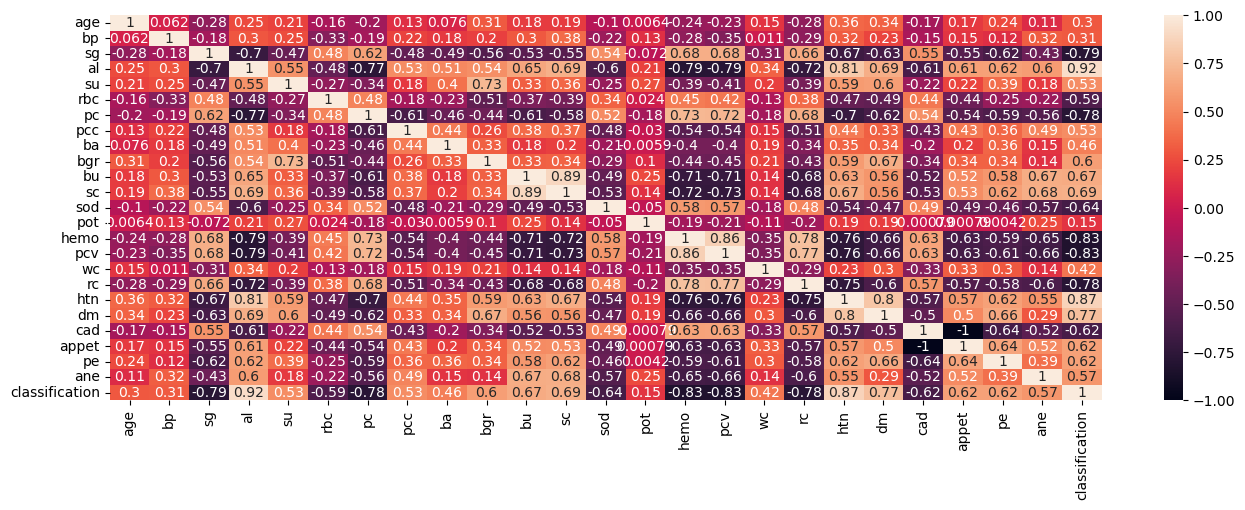

In [98]:
correlations_matrix = df.corr()
plt.figure(figsize = (16,5))
sns.heatmap(correlations_matrix, annot=True)
plt.show()

In [99]:
# A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an early sign that the kidneys are not working properly. As kidney disease progresses, the level of creatinine in the blood rises.
# https://www.kidney.org/atoz/content/kidneytests#:~:text=A%20creatinine%20level%20of%20greater,creatinine%20in%20the%20blood%20rises.

In [100]:

# A creatinine level of greater than 1.2 for women and greater than 1.4 for men may be an 
#early sign that the kidneys are not working properly. 
#As kidney disease progresses, the level of creatinine in the blood rises.

# hypothesis testing: the creatinine value for chronic disease 1.2 is or higher
# H0 = creatinine value for chronic disease is less than 1.2 <= 1.2 
# H1 = creatinine value for chronic disease 1.2 is or higher > 1.2
# Positive SC index means creatinine values stored in the column

In [ ]:
# The p-value is below threshhold of .05 and the Stat_Score is positive, the null (Ho) can be rejected.

In [103]:
import pandas as pd

from scipy import stats

In [117]:
KidneyDiseasePos = df[df['classification']== 1.2]
PositiveSCindex = KidneyDiseasePos['sc']

SCindex = PositiveSCindex.dropna()


SCindex = SCindex.replace("[$,]", "", regex=True)
SCindex = SCindex.astype(float)
SCindex

Series([], Name: sc, dtype: float64)

In [118]:
stats_value, pvalue = stats.ttest_1samp(SCindex,1.2)
print('Stat_Score =  ',stats_value)
print('Pvalue =  ',pvalue)

Stat_Score =   nan
Pvalue =   nan
